# Concatenate data and creating subsets

### Step 04
### Create Dataset

Here we create our complete dataset as well as the subsets.

Every CSV file in the specific folder of cleaned data is added. Change the file format or remove files to exclude unwanted data.

In [1]:
import glob
import pandas as pd
import os

#global variables 
debug = 0 #for a all (1) OR condensed output (0)

###### INPUTS
path = 'S:/Andreas/FH/Technikum/BA/'  #including slash at the end!
get = '40_Prep/'
put = '50_Datasets/'

###### ######

# Get data file names
##path = r'C:/Users/andre/Nextcloud/WS_2023/IKT/20_Data'
temp=path+get
all_files = glob.glob(os.path.join(temp, "*.csv"))

if debug:
    print(all_files)

print(f'> Fetching data...')
# Concatenate all data into one DataFrame
all_data = pd.concat((pd.read_csv(file) for file in all_files), ignore_index=False, axis=1)
print(f'...done')
if debug:
    print(all_data.tail())
    print(all_data.dtypes)

print(f'\n> Deleting unnecessary columns...')
# Dropping all duplicate columns (e.g. UTC)
all_data = all_data.loc[:, ~all_data.columns.duplicated()]
all_data = all_data.drop('OA_station', axis=1)
print(f'...done')
#'''


print(f'\n> Converting types and creating new columns...')
# Convert all datetimes which are imported as object into datetime64(ns)
all_data['UTC'] = pd.to_datetime(all_data['UTC']) #all_data['UTC'].apply(pd.to_datetime)
# make sure these columns are seen as numbers 
if 'OA_DD' in all_data.columns:
    all_data['OA_DD'] = all_data['OA_DD'].astype(float)
if 'OA_RF' in all_data.columns:
    all_data['OA_RF'] = all_data['OA_RF'].astype(float) #all_data['AU_RF'] = pd.to_numeric(all_data['AU_RF'], downcast='float')
if 'OA_FFAM' in all_data.columns:
    all_data['OA_FFAM'] = all_data['OA_FFAM']*3.6 #convert to km/h

#new columns
all_data['CR-HF'] = all_data['CR_T'] - all_data['HF_T']
all_data['CC-HF'] = all_data['CC_T'] - all_data['HF_T']
all_data['KE-HF'] = all_data['KE_T'] - all_data['HF_T']
all_data['KW-HF'] = all_data['KW_T'] - all_data['HF_T']
all_data['SR-HF'] = all_data['SR_T'] - all_data['HF_T']

print(f'...done')
#'''
if debug:
    print(all_data.tail())
all_data.info()

> Fetching data...
...done

> Deleting unnecessary columns...
...done

> Converting types and creating new columns...
...done
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359580 entries, 0 to 359579
Data columns (total 53 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   UTC            359580 non-null  datetime64[ns]
 1   BA_T           359580 non-null  float64       
 2   BA_T_FLAG      359580 non-null  int64         
 3   CC_T           359580 non-null  float64       
 4   CC_T_FLAG      359580 non-null  int64         
 5   CR_T           359580 non-null  float64       
 6   CR_T_FLAG      359580 non-null  int64         
 7   DR_T           359580 non-null  float64       
 8   DR_T_FLAG      359580 non-null  int64         
 9   HB_T           359580 non-null  float64       
 10  HB_T_FLAG      359580 non-null  int64         
 11  HF_T           359580 non-null  float64       
 12  HF_T_FLAG      359580 non-null

### (optional) Basic statistics on all (float) data

In [3]:
# Use describe-method:

#percentile list
#perc = [.20, .40, .60, .80]

# list of dtypes to include
include = ['float'] #['object', 'float', 'int']

print(f'> Describe all data columns with type(s): '+str(include))
print(all_data.describe(include=include))  #dataframe.describe(percentiles, include, exclude, datetime_is_numeric)


#Alternatives:
from summarytools import dfSummary
dfSummary(all_data)

#import pandas_profiling as pp
#pp.ProfileReport(all_data)

> Describe all data columns with type(s): ['float']
                BA_T           CC_T           CR_T           DR_T  \
count  359580.000000  359580.000000  359580.000000  359580.000000   
mean       22.192008      22.517425      22.406929      22.895704   
std         1.227700       1.160215       1.255001       1.195694   
min        19.200000      19.700000      19.600000      19.800000   
25%        21.200000      21.500000      21.300000      21.800000   
50%        21.800000      22.200000      22.100000      22.955000   
75%        23.400000      23.700000      23.600000      23.910000   
max        26.800000      25.100000      25.577000      29.267000   

                HB_T           HF_T           KE_T           KW_T  \
count  359580.000000  359580.000000  359580.000000  359580.000000   
mean       22.500994      22.414500      22.654725      22.395772   
std         0.869605       1.173419       1.286928       1.300608   
min        19.203000      18.389000      18.380000

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,UTC[datetime64[ns]],"Min: 2016-11-14Max: 2023-09-16Duration: 2,497 days",359580 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABNCAYAAACxBha+AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABxUlEQVR4nO3XQU7CUBRA0fcbJSCkDSHCAtwBQxbhYl0EK2DgxBEzEtKUUDEarBsAFQeXtN4z/bz+l+amCalpmpAI2bUX0P9hbMLcfHeYUhpERO8Pz80i4rPDc9e4sy1z703THE4dnI0tpTSYTCaPeZ6PL7npeDze1nX9MBqNXrIs++jaXJt2vca72e12ZUrp6VRw333ZenmejxeLxaEoirffXrZer8er1ep+Pp8/z2azsmtzbdqVnquqqr9cLsfb7bYXERfFFhERRVG8TafT199eWJblICJiOBx2cq5Nu17j3UTE4NyBfxCEMTZhjE0YYxPG2IQxNmGMTRhjE8bYhDE2YYxNGGMTxtiEMTZhjE0YYxPG2IQxNmGMTRhjE8bYhDE2YYxNGGMTxtiEMTZhjE0YYxPG2IQxNmGMTRhjE8bYhDE2YYxNGGMTxtiEMTZhjE0YYxPG2IQxNmGMTRhjE8bYhDE2YYxNGGMTxtiEMTZhjE0YYxPG2IQxNmGMTRhjE8bYhDE2YYxNGGMTxtiEMTZhjE0YYxPG2IQxNmGMTRhjE8bYhLn56QdVVfUveeB+v+9HRNR13d9sNnddm2vTrvTcT618AcqQOfTDCfo8AAAAAElFTkSuQmCC"">",0(0.0%)
2,BA_T[float64],Mean (sd) : 22.2 (1.2)min < med < max:19.2 < 21.8 < 26.8IQR (CV) : 2.2 (18.1),"2,731 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACd0lEQVR4nO3cu44aMRiG4d9hQQMogxASdNxApBSUXEQuNm26FBSpuQOaFQJxEGQJp0lFl5BgM2t/o/fpvbh4B2mW33ZFURiQug+xNwD8j5fYG7jHOdc0s4bn8mNRFG/P3A/iSTZU51yz1+t9yfO867N+u92unHNfibUakg3VzBp5nnfH4/Fbp9M5PLJws9lkk8mku1wuG2ZGqBWQcqhmZtbpdA79fv+nx9Lm0zeDaHiZggRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChYTkB6d9XS6XupnlzjnfP8GZq4RUMtT9fl8/nU6fh8NhrVarPXSM5SbkzBWHEp+vkqEej8eXLMtao9HoMBgMVo+uDzlzxaHEclQy1Jt2u+173srM/8wVhxJLUOlQY+JQ4nPx1g8JhAoJhAoJhAoJhAoJhAoJhAoJhAoJ/MM/MQzT/BmhJiT2ME3KCDUhMYdpUkeoCYo0TJM0XqYggVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhodSfUANvDMmv12v9mfuBrtJCDb0x5HQ6ZZfL5dPhcPhuZr6/e3sLGLfjAStBmd+o3jeGmJnNZrPudDptnc/nWhmbuydk3C72A1ZVpU9P+d4Yslqtok0BhYzbxXzAqowxvzt8xu1iPmBVxls/JBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJPxzzC/gOAmT7hEEXgSc7CXAd0MNOU5ym3RfLBY/fDa22+0yM7P9fp/N5/PWe62N+dmh+359ff0YchHwer3eOee+mZnXJcKBfhVF8dfP/Q09qiu3+bLq3AAAAABJRU5ErkJggg=="">",0(0.0%)
3,BA_T_FLAG[int64],Mean (sd) : 304.1 (200.0)min < med < max:100.0 < 500.0 < 500.0IQR (CV) : 400.0 (1.5),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABdklEQVR4nO3YUWrCQBSG0Zkioi8JIrgYF9HFdhHuRsr4UKWg6QpsY1DsL+e8Tm6Yh49LSB2GocB/9/bsC8AYs2dfgNdRa12WUuYTx7+HYTheOxQqd1FrXa7X6/eu61ZT5g+Hw2et9eNarELlXuZd16222+2x7/vTLYOttcVut1vt9/t5KWVaqI9c57yevu9Pm83ma8Lo8rfDX0N99DqHsf7aqA9d5zDWqG/UR61zGMt/VCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkwG/NQa21x64tba4vz+TwrpXS11psvRpzucrnMprby1zM/g8tOe8ATQSYAAAAASUVORK5CYII="">",0(0.0%)
4,CC_T[float64],Mean (sd) : 22.5 (1.2)min < med < max:19.7 < 22.2 < 25.1IQR (CV) : 2.2 (19.4),"2,336 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACuElEQVR4nO3dS6oaQRiG4a/iJa1Cixh05gYCGTh0EVlslhDBFbgDZ4KIYueIlzazQOCQHKusY/113mfe2oMXpW7d7na7CUjdp2ffAPAWzWffQCzOuY6kdsBHnG6328uj7gdhsgzVOdcZDoffy7Ic+H7Gfr/fOud+EGsasgxVUrssy8FsNnvp9/vHey/e7XbFYrEYbDabtiRCTUCuoUqS+v3+cTQa/fK8vPPQm0EQBlMwgVBhAqHCBEKFCYQKE7Ie9X9EgQsdyS5yEGpGQhc6Ul7kINS8eC90pL7IQagZCljoSHaRg8EUTCBUmECoMIFQYULSg6mAOcGyruvWo+8Hz5NsqCFzgufzubher1+Px+NPSb7b/JCQZENVwJzgarUaLJfL7uVyacS6ObyvlEOV5DcnuN1uk50PhB8GUzCBUGFC8n/9z3K9XluSSuecz+XJ7kKyilBfUVVV63w+f5tMJo1Go3H3KdaUdyFZRaivOJ1OzaIoutPp9Dgej7f3XJv6LiSrCPUfer1edruQrGIwBRMIFSYQKkwgVJhAqDCBUGECocIE5lHxR+CysRRx6ZhQISl82ViKu3RMqJA

### (optional) Basic statistics on cross-check of weather data

In [42]:
print(all_data[['OA_TL', 'OG_T']].describe())  #dataframe.describe(percentiles, include, exclude, datetime_is_numeric)
print('\n')
#all_data['AU_FFAM_kmh'] = all_data['AU_FFAM']*3.6
print(all_data[['OA_FFAM', 'OG_W']].describe()) 

               OA_TL           OG_T
count  359580.000000  359580.000000
mean       11.723520      11.532446
std         8.919574       9.220449
min       -16.100000     -16.400000
25%         4.600000       4.100000
50%        11.300000      11.129000
75%        18.700000      18.332250
max        38.300000      38.400000


             OA_FFAM           OG_W
count  359580.000000  359580.000000
mean       11.624106      14.936897
std         7.909809      11.596198
min         0.000000       0.000000
25%         5.400000       5.522400
50%         9.720000      12.060000
75%        16.200000      22.028000
max        70.920000     107.304000


#### Exkursus:
**Out of personal experience**, the room `CR (Corridor - reading corner)` might be the room where least changes in temperature due to sealings malfunction might occur (as there is no window to open). An installed controlled living room ventilation system running 365 days/year makes manual ventilation unnecessary and in practice windows are opened once a year for cleaning.
This room (and its window) is quite remote from the wind (predominantly blowing from the North-West) due to its location towards the East. Thats why the differences between this room and the most used and exposed to wind and outside temperatures part of the house  `HF (Hall - front door)` - the front door of the building - is used for analytics.

Alternatives - as there are windows to open but quite far away from the sensor:
> `KE (Kids East)` \
> `KW (Kids West)` \
> `SR (Sleeping room)` \
> `CC (Corridor - closet)` might be too near to bathroom, where temperature levels may be strongly intertwined with usage.

### Step 05
### Feature engineering/encoding

#### #01 - Finding Coldest months for subset "cold season"
In order to find subsets of the total dataset with similar features, data shall be clustered/binned into categories. With time series analysis on expected and over the long run realized weather data, timestamps are a useful way of categorisation as seasonal patterns should emerge.  

The potential problem with sealings is found easier, if the temperature difference between indoor and outside is highest. This is accomplished by creating a category "month" and calculating the mean of outside temperature for every of these 12 months which helps filtering data. The three coldest months in the year were then chosen for this subset. In order to validate this categorisation also a clustering for coldest days was performed. An average daily outside temperature below 5°C (with few readings slightly above this value) was seen after day 326 and before day 67 (of the year), confirming that this timespan selection is useful.

In [32]:
#check if full dataset
t = range(all_data.index.size)
t 

###### outside temperature
c = 32      #32 = oa_tl, 38 = og_t
#####
cn = all_data.iloc[:, c].name
# updating our dataFrame to have only one column as rest all columns are of no use for us at the moment 
# using .to_frame() to convert pandas series into dataframe.
#all_data[cn] = pd.to_numeric(all_data[cn]) # not necessary??
df_short = all_data[cn].to_frame()

#set date column as index
df_short = df_short.set_index(pd.DatetimeIndex(pd.to_datetime(all_data.iloc[:, 0])))
df_short.sort_index(inplace=True)
#df_short = df_short.asfreq(freq='10min')
df_short_day = df_short
#print(df_short.dtypes)
#'''
df_short['Mth'] = df_short.index.month.astype('category') #building a category on the index
print(df_short.groupby('Mth', sort=False, observed=False).mean())

'''
df_short_day['Day'] = df_short_day.index.dayofyear.astype('category')
#pd.set_option('display.max_rows', df_short_day.shape[0]+1)
print(df_short_day.groupby('Day', sort=False, observed=False).mean().head(365))
'''

         OA_TL
Mth           
11    6.264059
12    2.522248
1     1.352080
2     3.606060
3     6.694790
4    10.917057
5    15.198115
6    21.077391
7    22.007012
8    21.909604
9    16.769162
10   11.892156


"\ndf_short_day['Day'] = df_short_day.index.dayofyear.astype('category')\n#pd.set_option('display.max_rows', df_short_day.shape[0]+1)\nprint(df_short_day.groupby('Day', sort=False, observed=False).mean().head(365))\n"

#### #02 - Finding the windiest months
The same methodology used for finding the coldest months was applied to wind also. Hypothesis suggests that stronger wind puts more pressure to the front door increasing potential airleakages. 

Average wind speeds are highest between December and April in the used data set. But MoM (month on month) differences of average wind speed and wind direction do not change very much. Additionally this subset filtered on wind contains the coldest months, too. That's why further use of this potential subset was dismissed.

In [34]:
#check if full dataset
t = range(all_data.index.size)
t 

###### wind 
c = 40     #OG_W = 40; FFAM (m/s) = 13; DD = 11
######
cn = all_data.iloc[:, c].name
# updating our dataFrame to have only one column as rest all columns are of no use for us at the moment 
# using .to_frame() to convert pandas series into dataframe.
#all_data[cn] = pd.to_numeric(all_data[cn]) # not necessary??
df_short = all_data[cn].to_frame()

#set date column as index
df_short = df_short.set_index(pd.DatetimeIndex(pd.to_datetime(all_data.iloc[:, 0])))
df_short.sort_index(inplace=True)
#df_short = df_short.asfreq(freq='10min')
#print(df_short.dtypes)

df_short['Mth'] = df_short.index.month.astype('category') #building a category on the index
print(df_short.groupby('Mth', sort=False, observed=False).mean())

          OG_W
Mth           
11   14.913922
12   16.834112
1    16.709767
2    17.800649
3    16.206456
4    17.045428
5    15.095884
6    13.390035
7    12.813406
8    11.898219
9    12.215368
10   14.231702


#### #03 - (optional) Creating additional columns
Not a basic necessary step, but potentially useful for future in-depth analyses.

In [12]:
print(f'> Creating additional columns...')
all_data['OG_OA'] = all_data['OG_T'] - all_data['OA_TL']
print(f'...done')


>>> Creating additional columns...
...done


#### #04 - Difference normalization
Observed temperature differences of specific locations in the house serve as an indicator for airtightness. To find a trend more easily (at a later stage), the mean of difference in the first year of observations shall serve as the "neutral level" to start from. Therefore we calculate this number and add/subtract it from every observation in the datapoint, creating a new column "..._n".

In [ ]:
##### e.g. KO-VE
c = 66
period = 52596
#####
cn = all_data.iloc[:, c].name
# updating our dataFrame to have only one column as rest all columns are of no use for us at the moment 
# using .to_frame() to convert pandas series into dataframe.
all_data[cn] = pd.to_numeric(all_data[cn])
df_short = all_data[cn].to_frame()
m = df_short.head(period).mean()
print(m)
cnn = cn + '_n'
all_data[cnn] = all_data[cn].apply(lambda x: x - m)
print(f'> New column "'+cnn+'" added!')
print(all_data[cnn])

#### Excursus: List of columns if necessary

In [ ]:
# List of columns
#i = 0
#for col in all_data.columns:
#    print(str(i)+': '+col)
#    i += 1

all_data.info()

### Step 06 
### Creating subsets

In [42]:
from datetime import datetime

###### Create subsets
print(f'> Creating subsets:')

###### Various Parameters
#wind direction in degrees, speed, temperature
wind_h = 320.0 #max, lower than...
wind_l = 220.0 #min, higher than...
windspeed_l = 0.0 #min, higher than in m/s
temp_h = 5.0 #max, lower than...
#taking out missing data 
time_l = datetime(2018, 12, 1, 2, 0) #'12/01/2018 02:00'
time_h = datetime(2018, 11, 18, 9, 0) #'11/18/2018 09:00'
#####

subset1 = all_data[(all_data['OA_DD'] >= wind_l) & (all_data['OA_DD'] <= wind_h) & (all_data['OA_FFAM'] >= windspeed_l) & (all_data['OA_TL'] <= temp_h) & ((all_data.iloc[:, 0] <= time_h) | (all_data.iloc[:, 0] >= time_l))]
print(f'Subset 1 created with ' +str(subset1.shape[0])+ ' rows')
 #all_data.query(
print(f'Describe Subset 1 data...')
print(subset1.describe(include=include))

#subset1a = all_data[(all_data['AG_Temp'] <= temp_h)]
#print(f'Subset 1a created with ' +str(subset1a.shape[0])+ ' rows')


###### Based on Datetime only
mth_start = 12
mth_end = 2
######
#all_data = all_data.set_index(pd.DatetimeIndex(all_data['UTC']))
#s = all_data.index.month.astype('category') #building a category on the index
#s

subset2 = all_data[(all_data.iloc[:, 0].dt.month >= mth_start) | (all_data.iloc[:, 0].dt.month <= mth_end)]
#subset2 = all_data[(all_data.iloc[:, 0].index.month <= 2) & (all_data.iloc[:, 0].index.month >= 12)] 
print(f'Subset 2 created with ' +str(subset2.shape[0])+ ' rows')
print(f'Describe Subset 2 data...')
print(subset2.describe(include=include))

> Creating subsets:
Subset 1 created with 32884 rows
Describe Subset 1 data...
               BA_T          CC_T          CR_T          DR_T          HB_T  \
count  32884.000000  32884.000000  32884.000000  32884.000000  32884.000000   
mean      21.120955     21.501441     21.240903     21.708586     21.798457   
std        0.486215      0.469701      0.482564      0.734511      0.428491   
min       19.400000     19.900000     19.700000     19.800000     20.400000   
25%       20.800000     21.200000     20.903000     21.200000     21.500000   
50%       21.100000     21.500000     21.200000     21.600000     21.800000   
75%       21.400000     21.800000     21.500000     22.064250     22.100000   
max       23.600000     23.900000     23.800000     28.500000     23.500000   

               HF_T          KE_T          KW_T          LA_T          LR_T  \
count  32884.000000  32884.000000  32884.000000  32884.000000  32884.000000   
mean      21.251323     21.468358     21.185333    

### Step 07 
### (optional) Creating visuals

##### Starting with defining defaults.

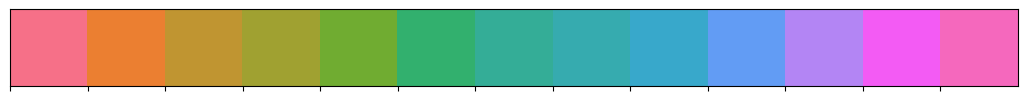

In [47]:
from matplotlib import pyplot as plt
import seaborn as sns

#plt.style.use('default')

#sns.set_palette('viridis')
'''
palette = sns.color_palette() # Default color palette
print(palette)  # Prints the RGB tuples that make up this color palette
sns.palplot(palette) # Plotting your palette!
'''
my = sns.color_palette('husl', 13)
#myh= sns.hls_palette('husl', 11) # Seaborn color palette, with 10 colors
sns.palplot(my) 
my.as_hex()[:]
#print(my)

#sns.color_palette("rocket", as_cmap=True) # Get a CMap

#sns.color_palette
#sns.axes_style


#plt.figure(figsize=(12, 6))
# override defaults
plt.rcParams['figure.figsize'] = [12, 6]

##### All rooms

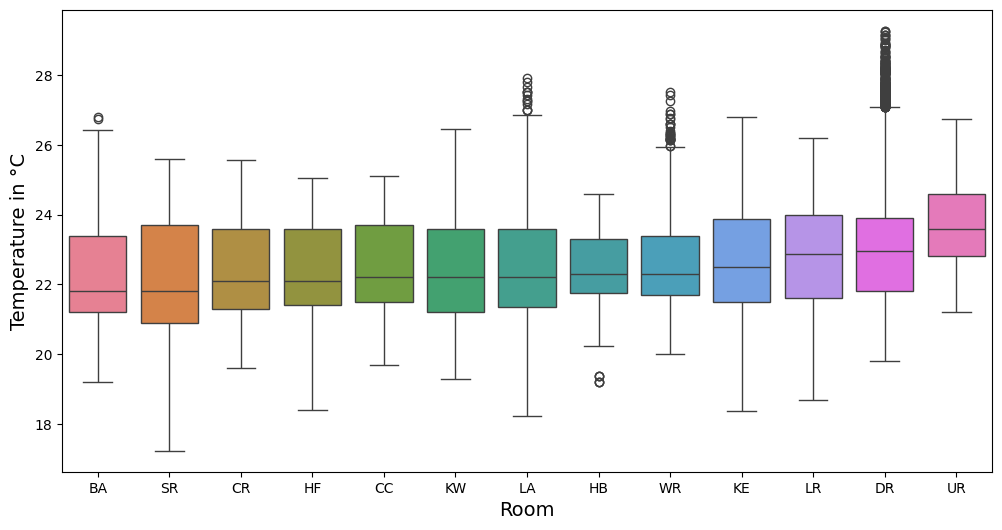

In [48]:
all_data_float = all_data.select_dtypes(include=[float])
all_data_float = all_data_float.filter(regex='T')
all_data_float = all_data_float.drop({'OG_T', 'OA_TL', 'OA_ZEITX'}, axis=1)

# sort the list of room temperatures via median of all data
index_sort_all = all_data_float.median().sort_values().index
df_sorted = all_data_float[index_sort_all]

# prepare names of columns for visualization
df_sorted.columns = df_sorted.columns.str.replace(r'_T', '')

#ax = sns.boxplot(x='attribute', y='temp', data=pd.melt(all_data))
ax = sns.boxplot(x='variable', y='value', hue='variable', data=pd.melt(df_sorted)) #(x=all_data.index, y=all_data.columns, data=all_data)
#ax = sns.boxplot(y='VE_Temp', data=all_data)
ax.set_xlabel('Room', fontsize=14)
ax.set_ylabel('Temperature in °C', fontsize=14)
plt.show()

##### Specific room per year

           DR_T
Yr             
2016  22.181985
2017  22.683111
2018  23.203285
2019  22.902614
2020  22.829903
2021  22.820135
2022  22.968267
2023  22.979945


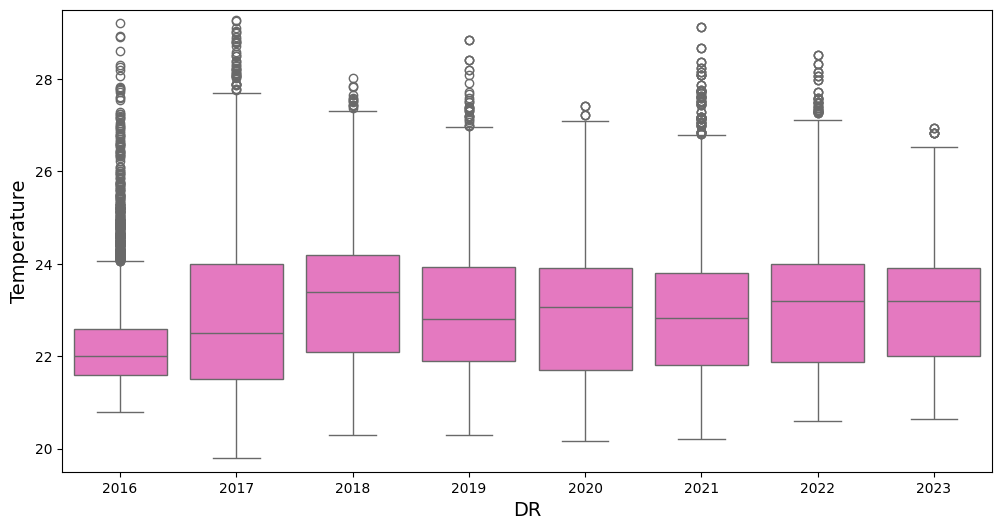

In [50]:
c = 7    #11 HF  #7 DR  36 GL_temp    
######
cn = all_data.iloc[:, c].name
# updating our dataFrame to have only one column as rest all columns are of no use for us at the moment 
# using .to_frame() to convert pandas series into dataframe.
all_data[cn] = pd.to_numeric(all_data[cn])
df_short = all_data[cn].to_frame()

# set date column as index
df_short = df_short.set_index(pd.DatetimeIndex(pd.to_datetime(all_data.iloc[:, 0])))
df_short.sort_index(inplace=True)
#df_short = df_short.asfreq(freq='10min')

df_short['Yr'] = df_short.index.year.astype('category') #building a category on the index
#print(df_short.dtypes)
print(df_short.groupby('Yr', sort=False, observed=False).mean())

# set category not only on mean per year but separate data per category to use further
grp = df_short.groupby(df_short['Yr'], sort=False, observed=False).mean()

def meanof(grp):
    y = grp[cn].agg('mean')
    grp['Mean_Temp'] = y
    return grp

df_short_yr = df_short.groupby('Yr', observed=False).apply(meanof)

'''
###different colours
#my_pal = {"2016": "g", "2017": "b", "2018":"m"}
my_pal = {yr: "r" if yr == 2018 else "b" for yr in df_short_yr.yr.unique()}
ax = sns.boxplot(x='yr', y=cn, hue='yr', data=df_short_yr, palette=my_pal, legend=False) #(x=all_data.index, y=all_data.columns, data=all_data)
'''
###one specific colour
ax = sns.boxplot(x='Yr', y=cn, data=df_short_yr, color='#f667c6')     #gl=darkgoldenrod; dr=#f667c6
#'''

ax.set_xlabel(cn.replace(r'_T', ''), fontsize=14)
ax.set_ylabel("Temperature", fontsize=14)
plt.ylim(19.5, 29.5)
plt.show()

#### Visuals on subset "cold season"

In [ ]:
all_data_float = subset2.select_dtypes(include=[float])
all_data_float = all_data_float.filter(regex='T')
all_data_float = all_data_float.drop({'OG_T', 'OA_TL', 'OA_ZEITX'}, axis=1)

df_sorted = all_data_float[index_sort_all]  #!!!!!TAKE SORTING OF ALL DATA

# prepare names of columns for visualization
df_sorted.columns = df_sorted.columns.str.replace(r'_T', '')

#ax = sns.boxplot(x='attribute', y='temp', data=pd.melt(all_data))
ax = sns.boxplot(x='variable', y='value', hue='variable', data=pd.melt(df_sorted)) #(x=all_data.index, y=all_data.columns, data=all_data)
#ax = sns.boxplot(y='VE_Temp', data=all_data)
ax.set_xlabel('Room', fontsize=14)
ax.set_ylabel('Temperature in °C', fontsize=14)
plt.show()

##### Specific room per year - "cold season"

           DR_T
Yr             
2016  22.050743
2017  21.637875
2018  22.187516
2019  21.921988
2020  21.715309
2021  21.806556
2022  21.880846
2023  21.858500


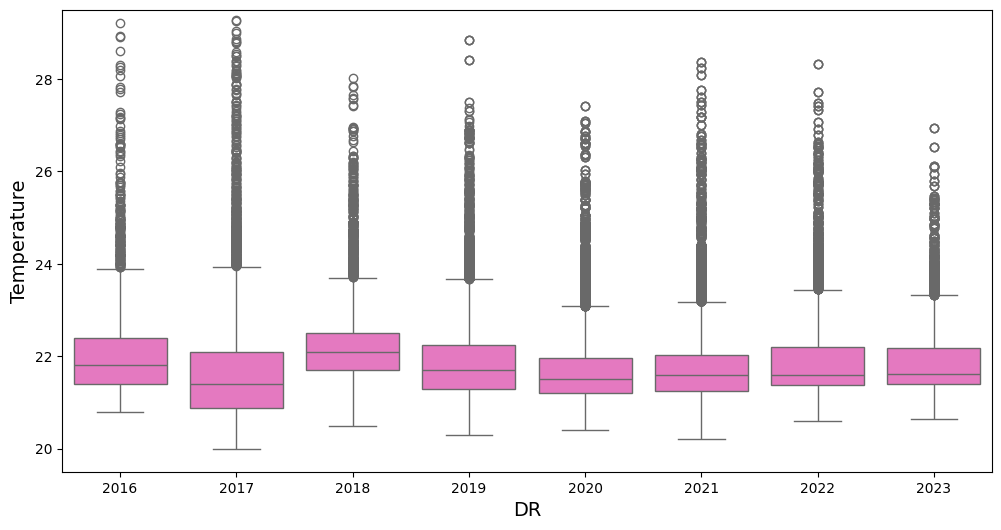

In [51]:
all_data = subset2

c = 7    #11 HF  #7 DR  36 GL_temp    
######
cn = all_data.iloc[:, c].name
# updating our dataFrame to have only one column as rest all columns are of no use for us at the moment 
# using .to_frame() to convert pandas series into dataframe.
all_data[cn] = pd.to_numeric(all_data[cn])
df_short = all_data[cn].to_frame()

# set date column as index
df_short = df_short.set_index(pd.DatetimeIndex(pd.to_datetime(all_data.iloc[:, 0])))
df_short.sort_index(inplace=True)
#df_short = df_short.asfreq(freq='10min')

df_short['Yr'] = df_short.index.year.astype('category') #building a category on the index
#print(df_short.dtypes)
print(df_short.groupby('Yr', sort=False, observed=False).mean())

# set category not only on mean per year but separate data per category to use further
grp = df_short.groupby(df_short['Yr'], sort=False, observed=False).mean()

def meanof(grp):
    y = grp[cn].agg('mean')
    grp['Mean_Temp'] = y
    return grp

df_short_yr = df_short.groupby('Yr', observed=False).apply(meanof)

'''
###different colours
#my_pal = {"2016": "g", "2017": "b", "2018":"m"}
my_pal = {yr: "r" if yr == 2018 else "b" for yr in df_short_yr.yr.unique()}
ax = sns.boxplot(x='yr', y=cn, hue='yr', data=df_short_yr, palette=my_pal, legend=False) #(x=all_data.index, y=all_data.columns, data=all_data)
'''
###one specific colour
ax = sns.boxplot(x='Yr', y=cn, data=df_short_yr, color='#f667c6')     #gl=darkgoldenrod; dr=#f667c6
#'''

ax.set_xlabel(cn.replace(r'_T', ''), fontsize=14)
ax.set_ylabel("Temperature", fontsize=14)
plt.ylim(19.5, 29.5)
plt.show()

### Step 08
### Calculate correlation matrix

In [74]:
'''
include = ['datetime', 'float', 'int']
all_data_sub = subset2.select_dtypes(include=include)  #subset1
print(all_data_sub)
all_data_sub.info()
'''

# taking only special columns not to overload graph of correlation matrix
all_data_sub_f = subset2.select_dtypes(include='float') #subset1
all_data_sub_f = all_data_sub_f.filter(regex='^(?!OA|OG).*')
##all_data_sub_f = all_data_sub_f.drop({'OG_T', 'OA_TL', 'OA_ZEITX'}, axis=1)
#all_data_sub_f = all_data.select_dtypes(include='float64')
all_data_sub_f.head()
all_data_sub_f.corr() #dataframe.corr(method, min_periods)


,BA_T,CC_T,CR_T,DR_T,HB_T,HF_T,KE_T,KW_T,LA_T,LR_T,SR_T,UR_T,WR_T,CR-HF,CC-HF,KE-HF,KW-HF,SR-HF
BA_T,1.000000,0.890773,0.842616,0.481016,0.814882,0.838361,0.595226,0.658208,0.812737,0.441660,0.643987,0.506959,0.796500,0.152949,0.213590,0.168916,0.180479,-0.050740
CC_T,0.890773,1.000000,0.952036,0.618219,0.906057,0.895874,0.756118,0.791564,0.858202,0.573881,0.579506,0.621529,0.776257,0.266960,0.335788,0.339057,0.318286,-0.178768
CR_T,0.842616,0.952036,1.000000,0.688381,0.822220,0.868056,0.830890,0.858547,0.851898,0.702602,0.679620,0.478588,0.765893,0.414158,0.287562,0.458280,0.438610,-0.037839
DR_T,0.481016,0.618219,0.688381,1.000000,0.516406,0.579048,0.830506,0.821193,0.565588,0.787746,0.347514,0.241536,0.480419,0.319025,0.154162,0.670525,0.645943,-0.146551
HB_T,0.814882,0.906057,0.822220,0.516406,1.000000,0.866290,0.596877,0.618351,0.732087,0.394197,0.354565,0.801671,0.780725,0.060836,0.188540,0.150537,0.098630,-0.408758
HF_T,0.838361,0.895874,0.868056,0.579048,0.866290,1.000000,0.661386,0.715691,0.798478,0.518229,0.555945,0.628590,0.727164,-0.092374,-0.117686,0.137298,0.116553,-0.303754
KE_T,0.595226,0.756118,0.830890,0.830506,0.596877,0.661386,1.000000,0.952114,0.684066,0.855242,0.497137,0.295142,0.554847,0.453890,0.287820,0.833750,0.757917,-0.052530
KW_T,0.658208,0.791564,0.858547,0.821193,0.618351,0.715691,0.952114,1.000000,0.755958,0.852420,0.558827,0.282763,0.599580,0.409798,0.251914,0.730535,0.777073,-0.032920
LA_T,0.812737,0.858202,0.851898,0.565588,0.732087,0.798478,0.684066,0.755958,1.000000,0.549657,0.582047,0.417986,0.743564,0.244683,0.225344,0.315600,0.355426,-0.084207
LR_T,0.441660,0.573881,0.702602,0.787746,0.394197,0.518229,0.855242,0.852420,0.549657,1.000000,0.519153,0.039494,0.449086,0.459051,0.184004,0.747964,0.745159,0.107413


##### Visualize relevant correlations

- First we have a look at all the correlations (matrix)
- Second we analyse which correlations a certain column has with other columns (in a descending order)

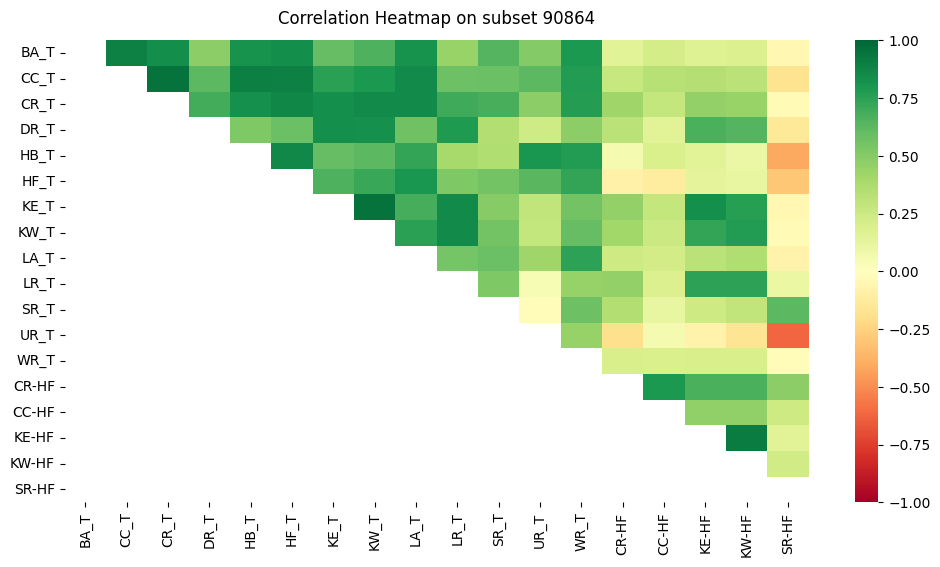

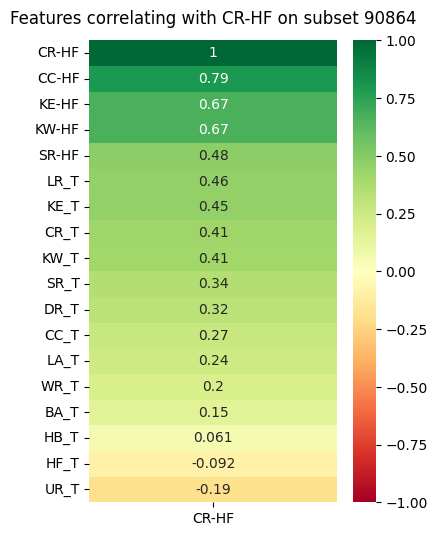

In [76]:
import numpy as np
import time
# create timestamp for export
date = time.strftime("%Y-%m-%d_%H%M%S")

# define the mask to set the values in the lower triangle to True (to hide it)
#mask = np.triu(np.ones_like(all_data_sub_f.corr()))
mask = np.tril(np.ones_like(all_data_sub_f.corr()))

# Increase the size of the heatmap
##########plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(all_data_sub_f.corr(), mask=mask, vmin=-1, vmax=1, annot=False, cmap="RdYlGn") #center=0 cmap="PiYG"

if (len(all_data_sub_f.index) < 359580):
    heatmap.set_title('Correlation heatmap on subset '+str(all_data_sub.shape[0]), fontdict={'fontsize':12}, pad=12);
    #plt.savefig('heatmap_subset_'+str(all_data_sub.shape[0])+'_'+date+'.png', dpi=300, bbox_inches='tight')
else:
    heatmap.set_title('Correlation heatmap on '+str(all_data_sub.shape[0]), fontdict={'fontsize':12}, pad=12);
    #plt.savefig('heatmap_total_'+date+'.png', dpi=300, bbox_inches='tight')

##### define variable (column) on which to specifically look at
diff_col = 'CR-HF'
#####

plt.figure(2, figsize=(4, 6))
heatmap2 = sns.heatmap(all_data_sub_f.corr()[[diff_col]].sort_values(by=diff_col, ascending=False), vmin=-1, vmax=1, annot=True, cmap="RdYlGn") #center=0 cmap="PiYG"
if (len(all_data_sub_f.index) < 359580):
    heatmap2.set_title('Features correlating with '+diff_col+' on subset '+str(all_data_sub.shape[0]), fontdict={'fontsize':12}, pad=12, );
else:
    heatmap2.set_title('Features correlating with '+diff_col+' on '+str(all_data_sub.shape[0]), fontdict={'fontsize':12}, pad=12);
#plt.savefig('heatmap_'+diff_col+'_'+date+'.png', dpi=300, bbox_inches='tight')

### Save total or subsets of data

In [77]:
if (len(all_data_sub.index) < 359580):
    file = path+put+'df_cs_'+str(all_data_sub.shape[0])+'.csv'
    all_data_sub.to_csv(file, sep=',', index=False, encoding='utf-8')
else:
    file = path+put+'df_al.csv'
    all_data.to_csv(file, sep=',', index=False, encoding='utf-8')
print(f'> Export to \'' + file + '\' successful')

> Export to 'S:/Andreas/FH/Technikum/BA/50_Datasets/df_cs_90864.csv' successful
